<a href="https://colab.research.google.com/github/Sunnychin1027/dsa_vaccine_project/blob/main/dsa_vaccine_pj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of Vaccine Coverage and Risk of Infection**

 Imagine you are a member of the Centers for Disease Control and Prevention (CDC) department.  We need to advocate for COVID-19 vaccination.

First, vaccination prevents severe illness and death while also reducing the transmission of the virus.
Second, it is a crucial strategy in controlling the rapid spread of the epidemic. So we are going to substantiate these claims with actual numbers.

However, there are some questions that come up with...
1. How was the percentages that each county of getting at least one dose.
2. How does the incidence of COVID-19 cases correlate with vaccination status?(do correlation according to the number of confirmed cases)
3. From which part of the county we need to reach out first to raise more awareness?(It will be the high risk counties and low percentage of vaccined people)

For years, people have been grappling with managing diseases like SARS in 2002 and H1N1 in 2009. If these experiences are well-documented and analyzed, people could draw from past knowledge to better deal with the unknown future.

The question remains: How can I classify counties into risk level group?

My audience will be
1. The manager of the CDC: Let them know where to start, spend the funding wisely.
2. Cititzens: Raise awareness about the issue that it is important to get vaccine.


In [1]:
import os
os.getcwd()

'/content'

In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Read the whole CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSA project/MO_County_Data_CSV_DSA7010F23_Project_Data-v2.csv',index_col=False)

# Display the whole DataFrame
df.head()

,cnty_fips,cnty_name,povpct,pop_2014,pop_densit,age_lt18,pct_age_lt,age_18_65,pct_age_18,age_gt_65,...,COVVac1Dos,COVFullVac,PctCOV1Dos,PctCOVFull,Cen2000PR,Cen2010PR,AllC_AAIRt,AllC_AvAnC,AllC_Statu,AllC_Rec5Y
0,29001,Adair,26.9,25602,44.864523,4759,18.6,17400,68.0,3443,...,9899,8783,0.39,0.35,0.79,0.81,456.3,116,stable,0.0
1,29003,Andrew,10.7,17379,39.784793,4020,23.1,10393,59.8,2967,...,5414,4879,0.31,0.28,0.81,0.79,427.3,98,stable,-0.1
2,29005,Atchison,12.2,5382,9.795111,1078,20.0,3046,56.6,1258,...,2364,2131,0.45,0.40,0.77,0.74,393.4,32,stable,-0.9
3,29007,Audrain,17.2,25887,37.117682,6068,23.4,15554,60.1,4265,...,8465,7161,0.33,0.28,0.79,0.80,464.9,148,falling,-1.0
4,29009,Barry,20.2,35662,45.068915,8321,23.3,20248,56.8,7093,...,14197,11608,0.40,0.33,0.69,0.60,386.1,196,stable,-0.7


Vet Data Sources

In [10]:
import plotly.express as px


df['percentages'] = (df['DosesAdmin']/df['Population'])*100
df_below50 = df[df['percentages'] < 50]
df_below50['percentages'] = df_below50['percentages'].round(2)
df_sorted = df_below50.sort_values(by='percentages', ignore_index=True)  # Sorting only the subset below 50%

# Create a bar plot
fig_bar = px.bar(df_sorted,  y='percentages', text='cnty_name',
                 title='Percentage of Dose Administration (under 50% in ascending Order)',
                 labels={'percentages': 'Percentage of Dose Administration'},
                 color='percentages',
                 color_continuous_scale='RdYlGn',
                 height=400)

fig_bar.show()

<ipython-input-10-7e275736f426>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Check the correlation in between
The target I want to varified
1. Accessibility v.s Total cases/ Total death
2. Vaccination(Percent population with 1 dose of COVID-19 vaccination) v.s Total cases/ Total death
3. Vaccination(Percent population with 1 dose of COVID-19 vaccination) v.s Death cases/ Total death

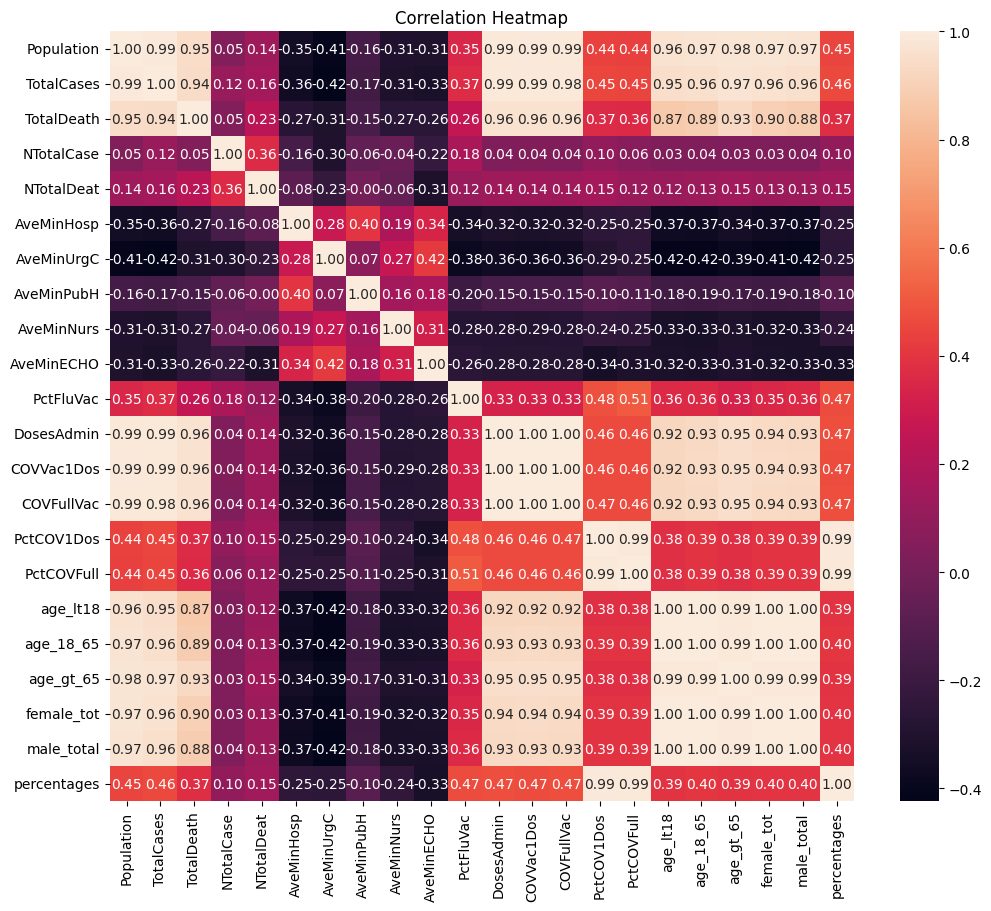

In [11]:
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

df_cor=df[['Population','TotalCases','TotalDeath','NTotalCase','NTotalDeat',
            'AveMinHosp','AveMinUrgC','AveMinPubH','AveMinNurs','AveMinECHO',
            'PctFluVac',
            'DosesAdmin','COVVac1Dos','COVFullVac','PctCOV1Dos','PctCOVFull',
           'age_lt18','age_18_65','age_gt_65','female_tot','male_total','percentages']]
cor = df_cor.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.margin=dict(l=200, r=200, t=100, b=100)
plt.show()

Filter the important ones...

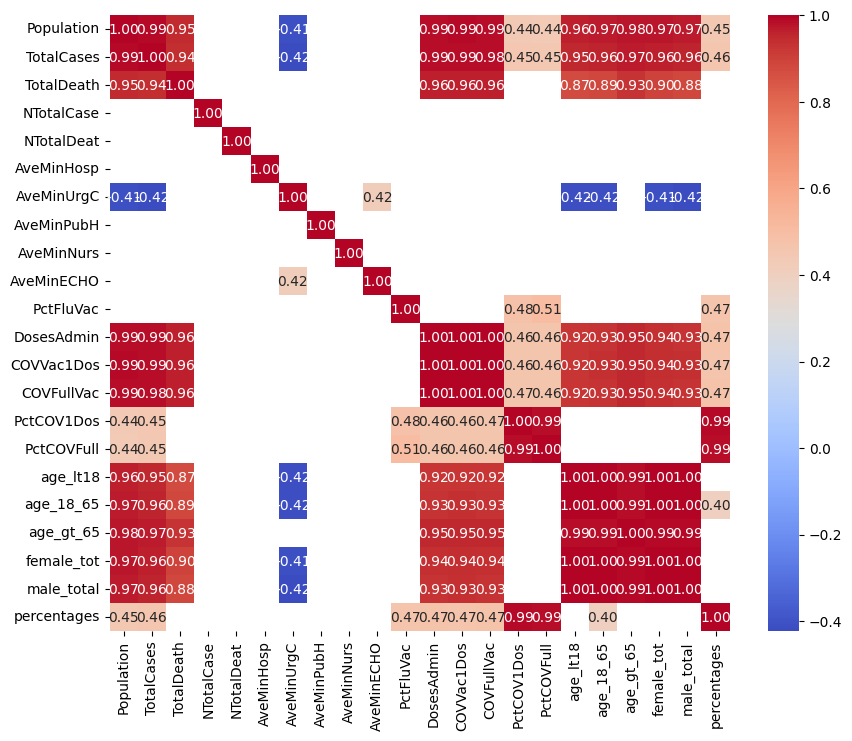

Correlations with TotalCases:
Population: 0.994353
TotalDeath: 0.939197
NTotalCase: 0.116857
NTotalDeat: 0.157082
AveMinHosp: -0.362466
AveMinUrgC: -0.423872
AveMinPubH: -0.171636
AveMinNurs: -0.312739
AveMinECHO: -0.327172
PctFluVac: 0.367915
DosesAdmin: 0.985093
COVVac1Dos: 0.985912
COVFullVac: 0.984904
PctCOV1Dos: 0.454206
PctCOVFull: 0.448991
age_lt18: 0.950872
age_18_65: 0.959684
age_gt_65: 0.966735
female_tot: 0.961574
male_total: 0.959418
percentages: 0.459273


In [12]:
# Set a correlation threshold
threshold = +0.4

# Filter out correlations above the threshold
significant_correlations = cor[abs(cor) > threshold]

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Print the significant correlations
# Choose a target column to analyze
target_column = 'TotalCases'

# Filter out correlations for the target column
correlations_with_target = cor[target_column]

# Iterate through the correlations and print them
print(f"Correlations with {target_column}:")
for col, correlation_value in correlations_with_target.items():
    if col != target_column:
        print(f"{col}: {correlation_value:.6f}")

 From the plot above shown that there are high correlation between getting vaccine age and total cases. But for the accessibility to get vaccine doesn't seem like having correlation in between. But negative correlation can be valuable in classify the risk.

Filter Results and Build and Validate Models

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df contains your 11 columns
X = df[['NTotalCase','TotalDeath','NTotalCase','NTotalDeat',
        'AveMinHosp','AveMinUrgC','AveMinPubH','AveMinNurs','AveMinECHO',
        'PctFluVac',
        'DosesAdmin','COVVac1Dos','COVFullVac','PctCOV1Dos','PctCOVFull',
        'age_lt18','age_18_65','age_gt_65','female_tot','male_total'
        ]]

feature_for_cluster = df[['NTotalCase']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(feature_for_cluster)
# df.head()

fig = px.scatter(df, x='Population', y='NTotalCase', color='Cluster', log_x=True,
                 title='Scatter Plot: Population vs. NTotal Cases (Logarithmic Scale)',
                 labels={'Population': 'Population', 'NTotalCases': 'NTotalCase'},
                 color_discrete_map={'Low_risk': 'green', 'Medium_risk': 'orange', 'High_risk': 'red'},
                 hover_name = 'cnty_name')

fig.show()

# Cluster0 = 3
# Cluster1 = 4
# Cluster2 = 1 highest = Risky
# Cluster3 = 5
# Cluster4 = 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Visualize Results

In [14]:
# Now assign the labels

risk_labels = {0: 'Medium_risk', 1: 'Low_risk', 2: 'Very_High_risk', 3: 'Very_Low_risk', 4: 'High_risk'}
df['Risk_level'] = df['Cluster'].map(risk_labels)

fig = px.scatter(df, x='Population', y='NTotalCase', color='Risk_level', log_x=True,
                 title='Scatter Plot: Population vs. NTotal Cases',
                 labels={'Population': 'Population', 'NTotalCases': 'NTotalCase'},
                 color_discrete_map={'Very_Low_risk': 'green',
                                     'Low_risk': 'blue',
                                     'Medium_risk': 'purple',
                                    'High_risk': 'orange',
                                    'Very_High_risk': 'red'},
                 hover_data=['cnty_name','PctCOV1Dos'],
                 hover_name = 'cnty_name')

fig.show()

**Try to compare those high risk place with those have a lower than 50% of dose administered**

In [15]:
# Base on the normalized total case, those county are at very high risk
high_r = df[df['Risk_level']=='Very_High_risk']
high_rs = high_r['cnty_name']

# Those county are Percentage of Dose Administration under 50%
df_below50 = df[df['percentages'] < 50]['cnty_name']
df_below50

# Find the common
common = high_rs[high_rs.isin(df_below50)]
common_name = common.values
common_str = ', '.join(common)
# common_str
print(f"County that are at very high risk and low percentage getting vaccine: {common_str}.")

counties = ['McDonald','Pemiscot']
check = ['cnty_name','TotalCases','DosesAdmin','percentages','Risk_level']
subset = df.loc[df['cnty_name'].isin(counties)]
subset = subset[check]
subset

# More efforts in the following counties must be made to persuade people to get vaccinated.
# Because in current status, they are at very high risk and low percentage of dose administration
# McDonald, Pemiscot

County that are at very high risk and low percentage getting vaccine: McDonald, Pemiscot.


,cnty_name,TotalCases,DosesAdmin,percentages,Risk_level
59,McDonald,1287,8530,37.351666,Very_High_risk
77,Pemiscot,853,5906,37.367922,Very_High_risk


**In conclusion**

My objective is to increase vaccine administration rates, targeting two main audiences: government officials and the general public.

For government officials, who may have budget constraints and require a prioritization strategy, I first calculate the vaccine coverage rates in areas below 50%. In the machine learning step, I used normalized total cases as an indicator of risk, classifying counties into five categories: very high risk, high risk, medium risk, low risk, and very low risk.

After confirming these two aspects, a cross-reference is conducted, identifying two areas that not only have low vaccine coverage but also high infection rates, categorizing them as very high-risk regions. These two areas become focal points, enabling the government to prioritize awareness campaigns or allocate additional resources.

For the general public, media reporting on areas with medium to high_risk or very_high_risk may encourage individuals to get vaccinated at nearby healthcare facilities. This, in turn, contributes to an overall increase in vaccine administration rates. When a sufficient proportion of the population is vaccinated, herd immunity is achieved, making it hard for the virus to spread.

**Future Work**

For future work, in areas with low vaccination rates, a decision tree or a similar analysis could be employed to understand the reasons behind the low vaccination coverage. This would involve examining demographic factors such as race, age, and gender, or other relevant aspects to gain more valuable insights.

For the coverage, it should be calculate in a reasonable value, for example, for people who have diabetes or chronic disease, childrens that are too young need to be subtract from the people who should be vaccinated, so maybe the percentages are not accurate enough to be the indicator.

Additionally, I was considering in this case, access to medical resources does not seem to be limited to general medical facilities, many malls in the US also offer vaccinations, providing a convenient option for people to access. If more places like malls can offer, it could further promote and increase vaccine accessibility.

Lastly, I think need to more clarify, or to define risk level. Because it can be "getting covid is okay, but have high risk to death" meaning very high risk...